In [1]:
%autosave 0 

Autosave disabled


In [2]:
import grpc
import tensorflow as tf
from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc
import matplotlib.pyplot as plt


2022-12-01 23:54:54.672431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
host = 'localhost:8500'
channel = grpc.insecure_channel(host) 
stub = prediction_service_pb2_grpc.PredictionServiceStub(channel)


In [4]:
from keras_image_helper import create_preprocessor

preprocessor = create_preprocessor('xception', target_size=(299, 299))
url = 'http://bit.ly/mlbookcamp-pants'
X = preprocessor.from_url(url)

In [5]:
def np_to_protobuf(data):
    return tf.make_tensor_proto(data, shape=data.shape)

pb_request = predict_pb2.PredictRequest()
pb_request.model_spec.name = 'dapper-model'
pb_request.model_spec.signature_name = 'serving_default'
pb_request.inputs['input_8'].CopyFrom(np_to_protobuf(X))

pb_response = stub.Predict(pb_request, timeout=20.0)
predictions = pb_response.outputs['dense_7'].float_val

In [6]:
predictions

[-1.8682901859283447, -4.761244773864746, -2.316983938217163, -1.0625702142715454, 9.887157440185547, -2.8124325275421143, -3.66628360748291, 3.2003612518310547, -2.6023385524749756, -4.83504581451416]

In [7]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

dict(zip(classes, predictions))


{'dress': -1.8682901859283447,
 'hat': -4.761244773864746,
 'longsleeve': -2.316983938217163,
 'outwear': -1.0625702142715454,
 'pants': 9.887157440185547,
 'shirt': -2.8124325275421143,
 'shoes': -3.66628360748291,
 'shorts': 3.2003612518310547,
 'skirt': -2.6023385524749756,
 't-shirt': -4.83504581451416}

<BarContainer object of 10 artists>

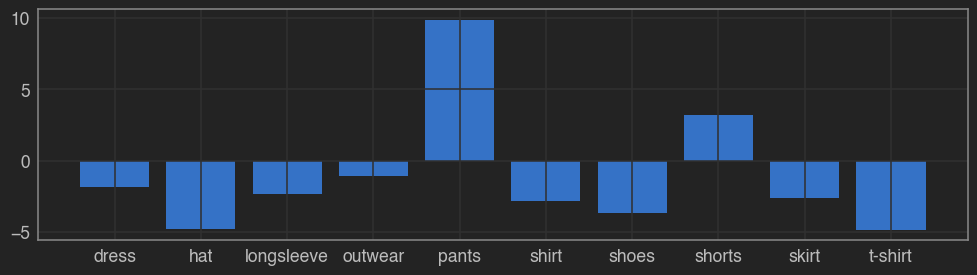

In [8]:
classes, predictions = zip(*dict(zip(classes, predictions)).items())
plt.figure(figsize=(12, 3))
plt.bar(classes, predictions)